In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.sample(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,41,Female,65,38,35
76,77,Female,45,54,53
3,4,Female,23,16,77
105,106,Female,21,62,42
196,197,Female,45,126,28
104,105,Male,49,62,56
81,82,Male,38,54,55
167,168,Female,33,86,95


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
cat = ['Gender']
num =  data[[col for col in data.columns if (str(data[col].dtype) != 'object') and col not in cat]]

In [6]:
data[cat].describe()
#mayoritas wanita

,Gender
count,200
unique,2
top,Female
freq,112


In [7]:
data.describe().style.background_gradient(axis=1,cmap=sns.light_palette('brown', as_cmap=True))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


1. rata-rata umur 38.5th dengan min 18th dan maks 70th, dan kemungkinan distribusi berbentuk skew
2. pendapatan tahunan rata-rata $60.56k dengan pendapatan min $15k
3. skor dalam membelanjakan uangnya rata-rata 50 dan kemungkinan berdistribusi normal

In [8]:
for col in cat: #berikut adalah searan nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Gender:
Female    112
Male       88
Name: Gender, dtype: int64



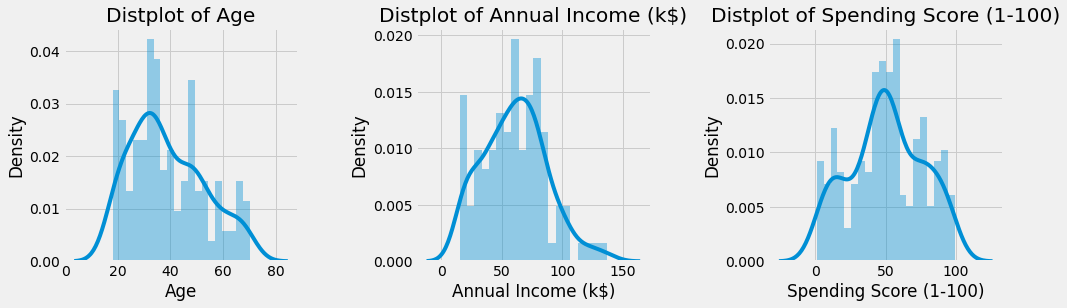

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15, 4))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3, n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [10]:
print("Skew: {}".format(data.skew())) #cek nilai skew

Skew: CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


Text(0.5, 1.0, 'PROPORSI gender(%)')

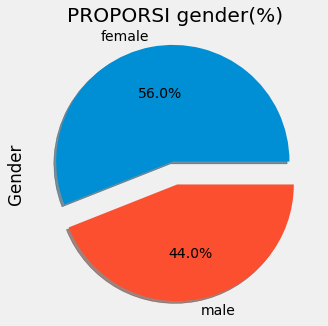

In [11]:
#EDA VISUALIZATION
labels = 'female','male'
data['Gender'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI gender(%)") #data imbalance perlu tindakan

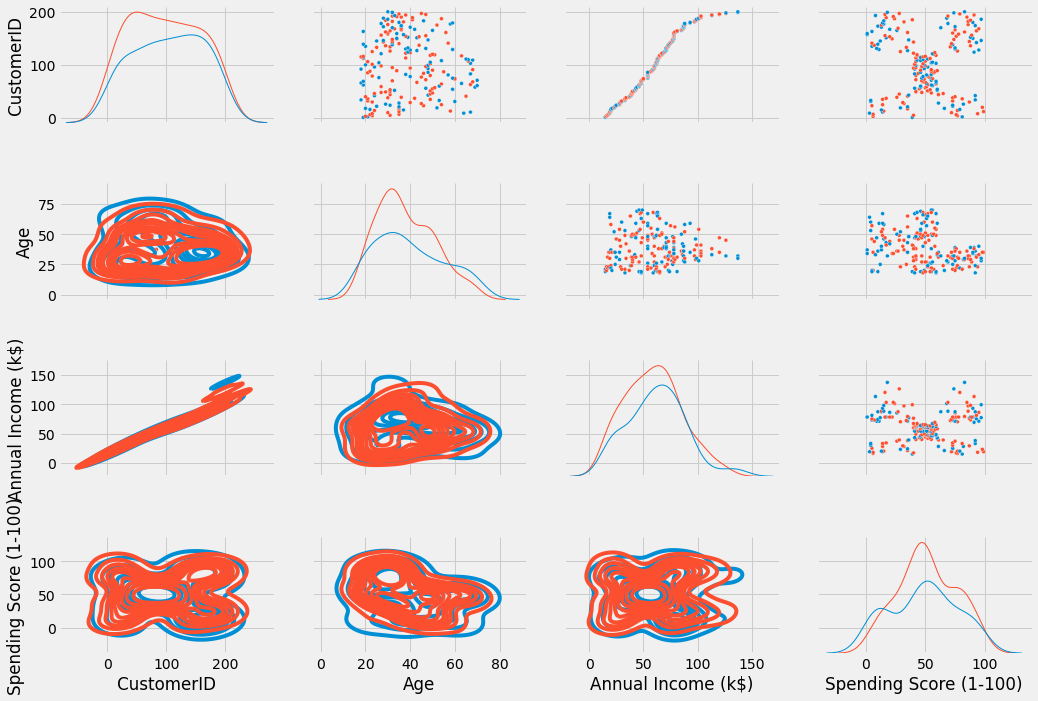

In [12]:
grid = sns.PairGrid(data, hue='Gender', diag_sharey=False, aspect=1.5)
grid.map_upper(sns.scatterplot, s=15)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.kdeplot, lw=1);

Plot Skor Penghasilan dan Pengeluaran Tahunan tampaknya dibentuk dengan lima wilayah padat: 4 wilayah 

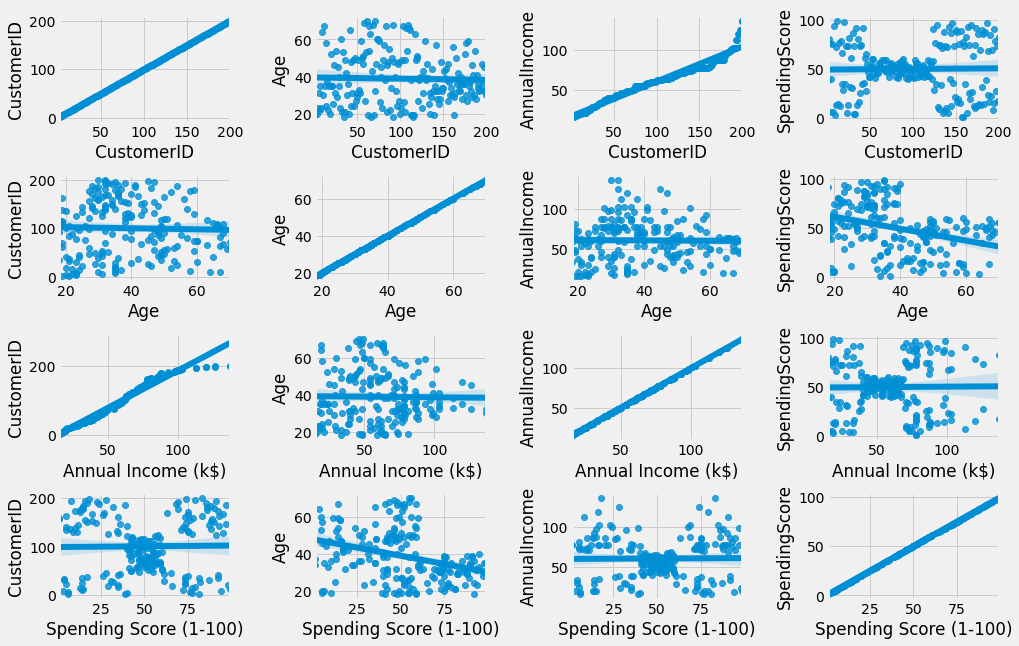

In [13]:
plt.figure(1,figsize=(15,10))
n=0
for x in num:
    for y in num:
        n+=1
        plt.subplot(4,4,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=data)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

customerID berbanding lurus dengan annual income sehingga apabila semakin banyak customer maka akan semakin banyak annual incomenya

sedangkan semakin bertambah umur maka hasrat berbelanja semakin menurun

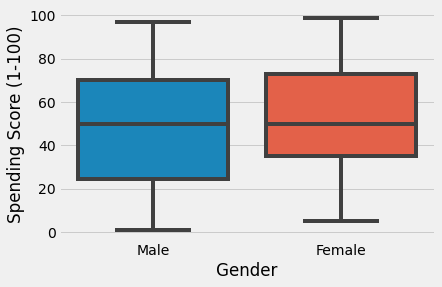

In [14]:
sns.boxplot(data=data, x='Gender', y='Spending Score (1-100)');
#terlihat Wanita cenderung menghabiskan lebih banyak daripada pria

In [15]:
def impute_spending_group(spending_score):
    if spending_score <= 35:
        return 'low'
    if spending_score > 35 and spending_score <= 70:
        return 'medium'
    if spending_score > 70:
        return 'high'

data['SpendingGroup'] = data['Spending Score (1-100)'].apply(impute_spending_group)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),SpendingGroup
0,1,Male,19,15,39,medium
1,2,Male,21,15,81,high
2,3,Female,20,16,6,low
3,4,Female,23,16,77,high
4,5,Female,31,17,40,medium


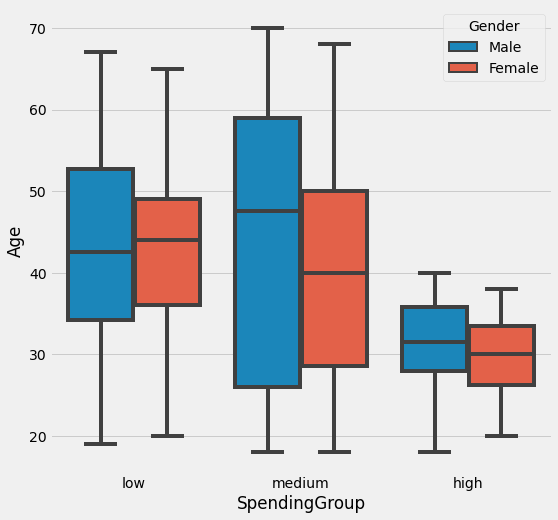

In [16]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, x='SpendingGroup', y='Age', hue='Gender', order=['low', 'medium', 'high']);

dari plot Kelompok Pembelanjaan - Usia kita dapat melihat bahwa variasi terendah ada pada kelompok pembelanjaan tinggi. Anggotanya termasuk dalam kelompok usia 20-40 tahun. Kelompok pengeluaran rendah dan menengah tampaknya secara kasar mencakup seluruh rentang usia.

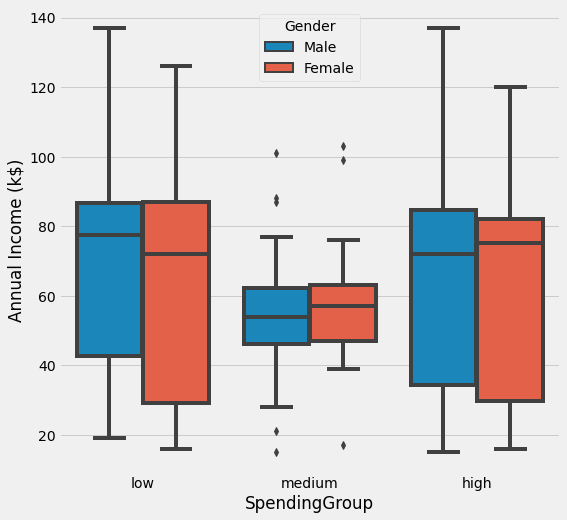

In [17]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=data, x='SpendingGroup', y='Annual Income (k$)', hue='Gender', order=['low', 'medium', 'high']);

Dari Spending Group - Annual Income plot kita dapat melihat bahwa pelanggan dari pusat distribusi pendapatan tahunan ($40k- $60k) termasuk dalam kelompok pembelanjaan menengah

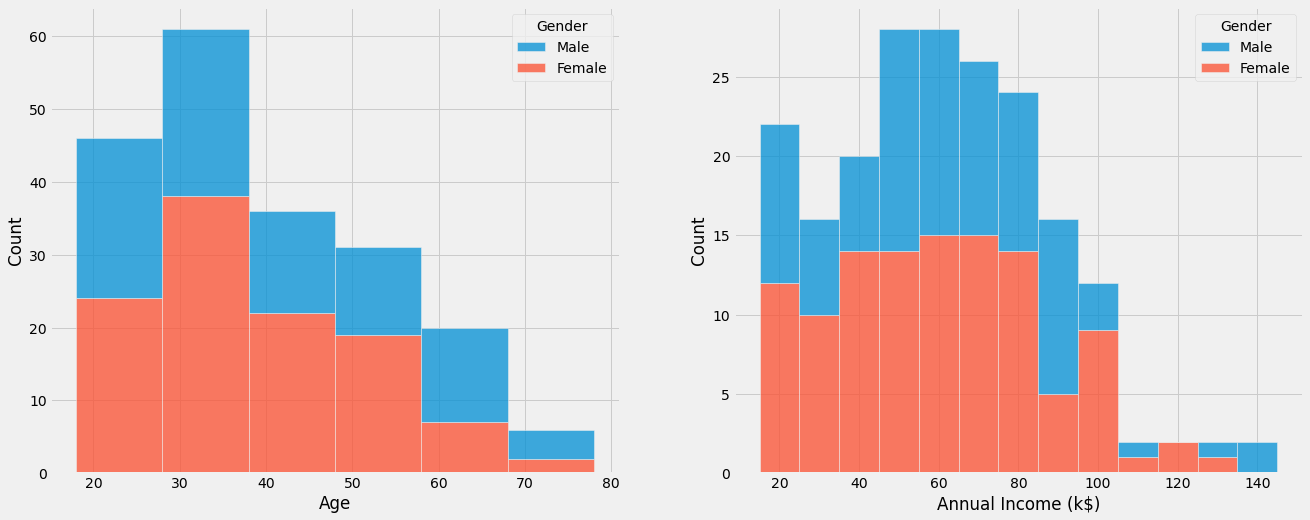

In [18]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=data, x='Age', hue='Gender', binwidth=10, multiple='stack', ax=ax0)
sns.histplot(data=data, x='Annual Income (k$)', hue='Gender', binwidth=10, multiple='stack', ax=ax1);

terlihat sebaran umur mayoritas umur 30-40th, dan Sebagian besar pelanggan menghasilkan antara $ 50k dan $ 80k setiap tahun

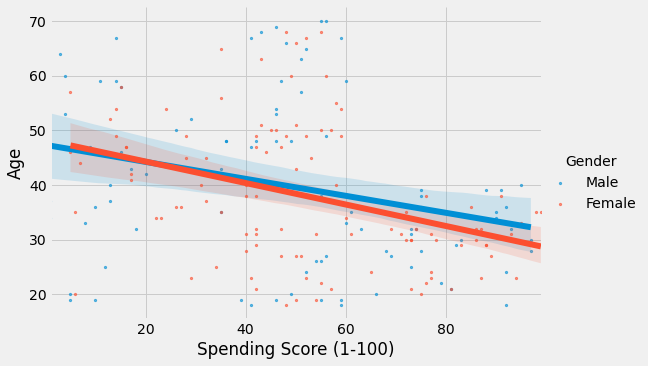

In [19]:
sns.lmplot(
    data=data,
    x='Spending Score (1-100)', 
    y='Age', 
    hue='Gender',
    aspect=1.5,
    scatter_kws={'s': 5, 'alpha': 0.6});

Ada hubungan linier antara Skor Pengeluaran dan Usia. Pelanggan yang lebih muda cenderung memiliki skor pengeluaran yang lebih tinggi dan skor pengeluaran menurun ketika usia bertambah.

In [20]:
data.corr().style.background_gradient(cmap='seismic', axis=None)
#terdapat multikolinearitas antara customerID dgn annual income

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [21]:
#Age and spending Score
X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

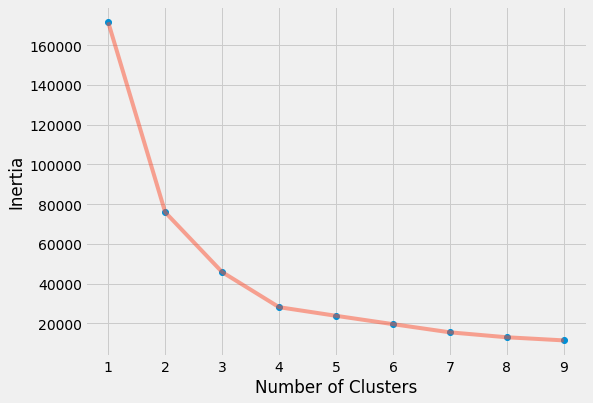

In [22]:
#visual sekreplot
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [23]:
from sklearn.metrics import silhouette_samples,silhouette_score
for num in range(2,9):
    clusters = KMeans(n_clusters=num,random_state=75)
    labels = clusters.fit_predict(X1)
    
    sil_avg = silhouette_score(X1, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.4692341232501655
For 3 The Silhouette Score is = 0.45300127016521263
For 4 The Silhouette Score is = 0.49973941540141753
For 5 The Silhouette Score is = 0.4460311217292306
For 6 The Silhouette Score is = 0.4422780039885027
For 7 The Silhouette Score is = 0.42313509747504796
For 8 The Silhouette Score is = 0.42996983892561397


In [24]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [25]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

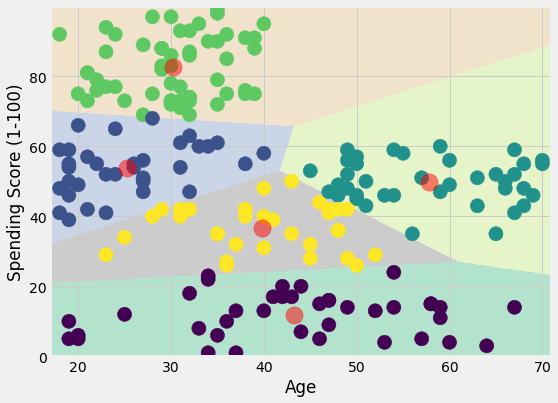

In [26]:
plt.figure(1 , figsize = (8 ,6) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [27]:
'''Annual Income and spending Score'''
X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

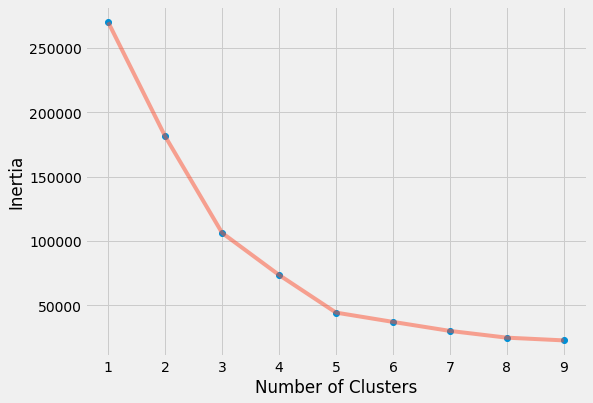

In [28]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [29]:
for num in range(2,9):
    clusters = KMeans(n_clusters=num,random_state=75)
    labels2 = clusters.fit_predict(X2)
    
    sil_avg = silhouette_score(X2, labels2)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.2968969162503008
For 3 The Silhouette Score is = 0.46761358158775435
For 4 The Silhouette Score is = 0.4931963109249047
For 5 The Silhouette Score is = 0.553931997444648
For 6 The Silhouette Score is = 0.5393922132561455
For 7 The Silhouette Score is = 0.5270287298101395
For 8 The Silhouette Score is = 0.45407359550241166


In [30]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [31]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

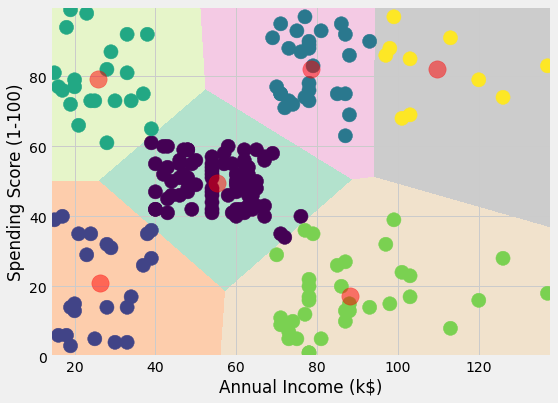

In [32]:
plt.figure(1 , figsize = (8 ,6) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [33]:
#Segmentation using Age , Annual Income and Spending Score

X3 = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 75  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

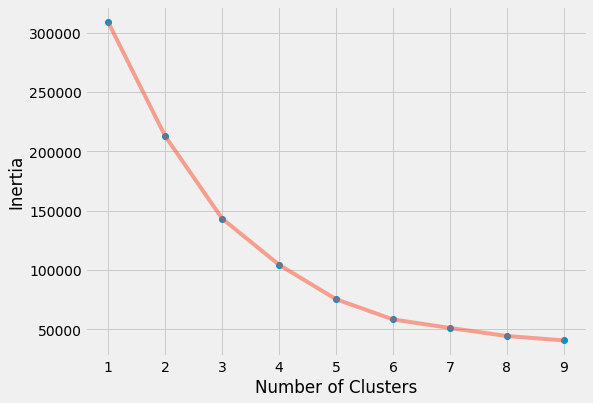

In [34]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [35]:
for num in range(2,9):
    clusters = KMeans(n_clusters=num,random_state=75)
    labels3 = clusters.fit_predict(X3)
    
    sil_avg = silhouette_score(X3, labels3)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.293166070535953
For 3 The Silhouette Score is = 0.3839349967742105
For 4 The Silhouette Score is = 0.40546302077733304
For 5 The Silhouette Score is = 0.44428597560893024
For 6 The Silhouette Score is = 0.4523443947724053
For 7 The Silhouette Score is = 0.43978902692261157
For 8 The Silhouette Score is = 0.42790288922594905


In [36]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [37]:
data['label3'] =  labels3
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['label3'], 
        size= 20,
        line=dict(
            color= data['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)